# finance-datareader를 이용한 주식데이터 수집

## 0. Install packages

In [1]:
!pip install finance-datareader
!pip install -U finance-datareader # 업데이트

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 566.0 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import json
import re

In [3]:
# 한국거래소에 상장된 모든 종목 리스트 가져오기
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,79900,1,1700,2.17,79700,80100,79200,26131889,2083036126500,476985625745000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,177200,1,7800,4.60,172000,179500,171900,5692799,1005287504900,129002019078000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,406500,2,-8000,-1.93,417000,417500,406000,152540,62977624500,95121000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,827000,2,-13000,-1.55,846000,849000,826000,55020,45973595000,58860898000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,66700,1,1000,1.52,66400,66800,66200,1321751,88008185800,54886542890000,822886700,STK


In [8]:
df = fdr.DataReader('036570','2020-01-01', '2024-03-12') # NCsoft 주가를 2020년부터 현시점까지 가져온다

In [9]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,542000,545000,539000,541000,40246,0.000000
2020-01-03,547000,568000,542000,565000,112404,0.044362
2020-01-06,562000,587000,562000,579000,107006,0.024779
2020-01-07,583000,596000,574000,594000,84378,0.025907
2020-01-08,587000,604000,584000,604000,109267,0.016835
...,...,...,...,...,...,...
2024-03-06,189100,189600,185200,187300,120992,-0.010042
2024-03-07,187300,188700,185000,186200,80308,-0.005873
2024-03-08,188100,193400,188100,188300,101898,0.011278


In [10]:
df = df.fillna(0)

(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01')])

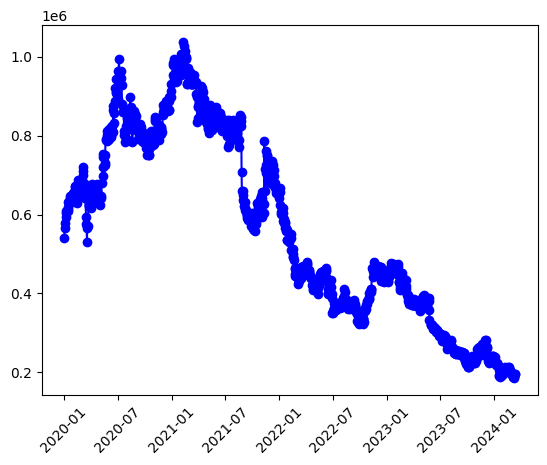

In [11]:
plt.plot(df['Close'], 'bo-')
plt.xticks(rotation=45)

## 3. 실습: 급등주를 찾아라!
 - 특정 거래일의 거래량이 이전 시점의 평균 거래량보다 500% 이상 급증하는 종목을 찾아 매수하자!

